# URI - Problems and Solutions

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [282]:
data = pd.read_csv('level_solutions.csv', header=None, names=['Level', 'Solutions']).reset_index()
data.head()

,index,Level,Solutions
0,0,1,89804
1,1,1,63659
2,2,1,60080
3,3,1,59711
4,4,1,51529


In [283]:
count = data.groupby(['Level']).agg(['count'])['Solutions']
count

,count
Level,
1,280
2,190
3,187
4,172
5,421
6,106
7,76
8,46
9,14


In [284]:
index = {}

def set_index(level):
    delta = 1.0 / count['count'][level]
    offset = level - 1
    i = index.get(level, 0)
    index[level] = i + 1
    
    return offset + i * delta
    
data['x'] = data['Level'].apply(set_index)
del data['index']
data.head()

,Level,Solutions,x
0,1,89804,0.000000
1,1,63659,0.003571
2,1,60080,0.007143
3,1,59711,0.010714
4,1,51529,0.014286


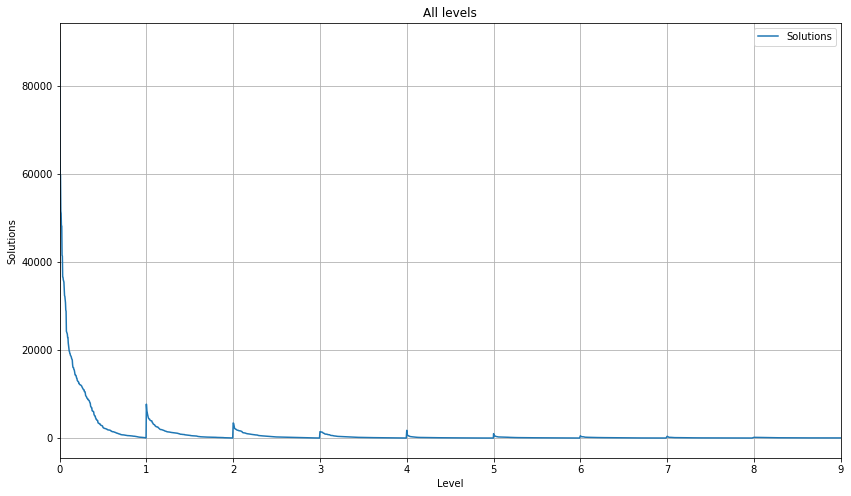

In [285]:
ax = data.plot(
        kind='line',
        x='x',
        y='Solutions',
        figsize=(14,8),
        grid=True,
    );

ax.set_xlabel('Level')
ax.set_ylabel('Solutions')
ax.set_title('All levels')

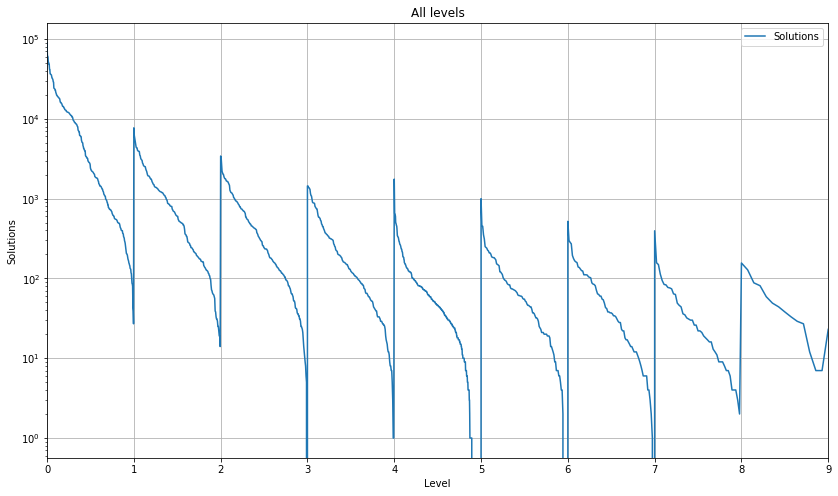

In [287]:
ax = data.plot(
        kind='line',
        x='x',
        y='Solutions',
        figsize=(14,8),
        grid=True,
        logy=True,
    );

ax.set_xlabel('Level')
ax.set_ylabel('Solutions')
ax.set_title('All levels')

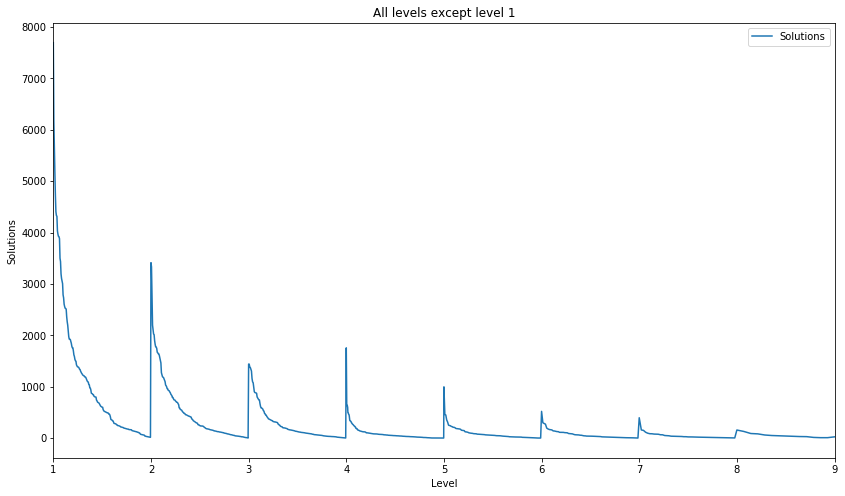

In [291]:
data = data[data.Level > 1]

ax = data.plot(
        kind='line',
        x='x',
        y='Solutions',
        figsize=(14,8),
    );

ax.set_xlabel('Level')
ax.set_ylabel('Solutions')
ax.set_title('All levels except level 1')

In [289]:
data2 = pd.read_csv('level_stddev_avg.csv', header=0)
data2

,level,stddev,avg
0,1,12474,8392
1,2,1308,1087
2,3,621,515
3,4,329,262
4,5,142,84
5,6,126,90
6,7,84,69
7,8,64,45
8,9,44,54
9,10,0,23


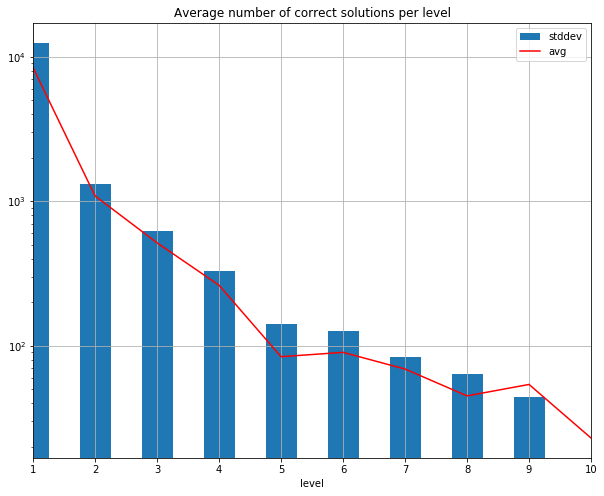

In [290]:
ax2 = data2.plot(
        kind='bar',
        x='level',
        y='stddev',
        title='Average number of correct solutions per level',
        figsize=(10,8),
      )

ax2 = data2.plot(
        kind='line',
        x='level',
        y='avg',
        use_index=False,
        ax=ax2,
        color='r',
        logy=True,
        grid=True
      )